In [2]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import math
%cd ..
%ls

C:\Users\Dongmin Kim\Documents\OnlineTSAD
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 067D-FB3E

 C:\Users\Dongmin Kim\Documents\OnlineTSAD 디렉터리

2023-04-26  오후 08:53    <DIR>          .
2023-04-26  오후 08:53    <DIR>          ..
2023-04-10  오후 01:01               156 .gitignore
2023-04-27  오후 08:26    <DIR>          .idea
2023-04-14  오후 04:53    <DIR>          .ipynb_checkpoints
2023-04-26  오후 03:34    <DIR>          cfgs
2023-04-26  오후 05:50    <DIR>          data
2023-04-26  오전 11:09    <DIR>          EDA
2023-04-26  오후 03:42    <DIR>          Exp
2023-04-27  오후 08:29    <DIR>          figures
2023-04-09  오후 02:54    <DIR>          hptune
2023-04-25  오후 02:54    <DIR>          models
2023-04-26  오후 09:18    <DIR>          outputs
2023-04-22  오후 06:44    <DIR>          plots
2023-04-26  오후 07:53    <DIR>          results
2023-04-26  오후 02:24             3,639 test.py
2023-04-26  오후 08:43    <DIR>          thresholding
2023-03-15  오후 03:49             3,099 train.py
2023-04-22  오후 01:24    <DIR

(496800,)


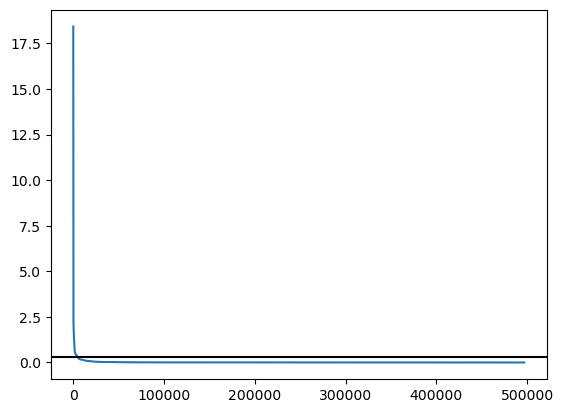

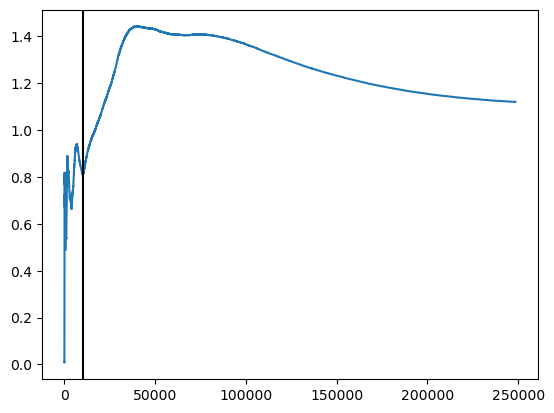

risk:0.020128824476650563


In [39]:
def plot_train_error(train_error_pt_path, kst=10000):
    with open(train_error_pt_path, 'rb') as f:
        train_errors = torch.load(f, map_location=torch.device('cpu'))
    train_errors = train_errors.reshape(-1).numpy()
    print(train_errors.shape)
    train_errors = np.sort(train_errors)[::-1]
    plt.plot(train_errors)
    z = np.quantile(train_errors, 0.99)
    plt.axhline(z, color="black")
    plt.show()

    logX = np.log(train_errors)
    lst = []
    q = 0.5
    for k in range(2, int(len(train_errors)*q)):
        lst.append(np.mean(logX[:k]-logX[k]))
    plt.plot([k for k in range(2, int(len(train_errors)*q))], lst)
    
    plt.axvline(kst, color="black")
    plt.show()
    
    print(f"risk:{kst/len(train_errors)}")
    
    #n = len(train_errors)
    #x = [-math.log(j/(n+1)) for j in range(n, 0, -1)]
    #y = [math.log(train_errors[j]) for j in range(n-1, -1, -1)]
    #plt.scatter(x, y)
    #linear_model = np.poly1d(np.polyfit(x, y, 1))    
    ##xp = np.linspace(0, 14, 100)
    #plt.plot(xp, linear_model(xp), color="black")
    #_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
    #plt.show()
train_error_pt_path = os.path.join("outputs", "MLP_SWaT_normalization_SlowRevIN", "train_errors.pt")
plot_train_error(train_error_pt_path)

SWaT
(496800,)


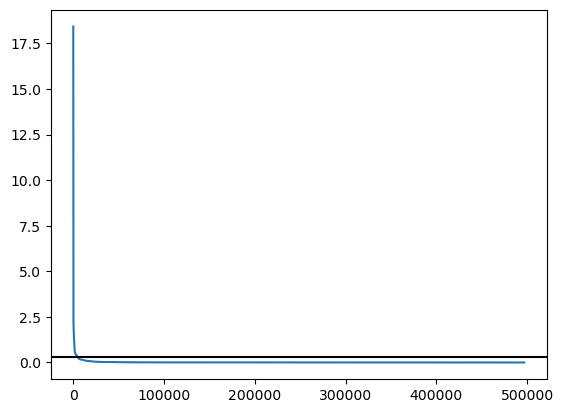

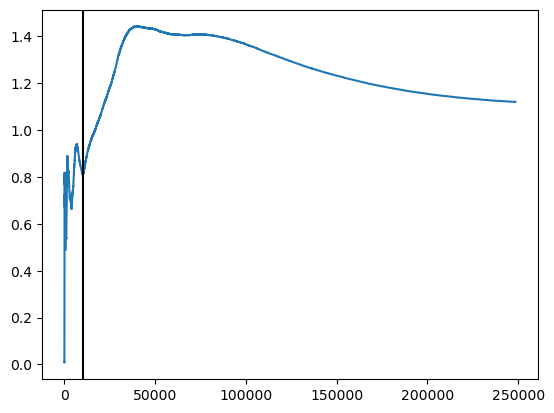

risk:0.020128824476650563
WADI
(784560,)


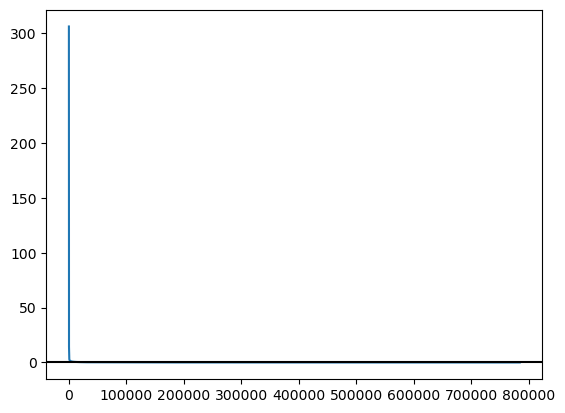

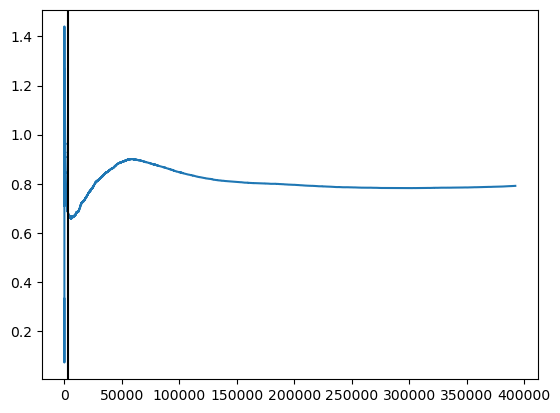

risk:0.0038237993270113183
PSM
(132480,)


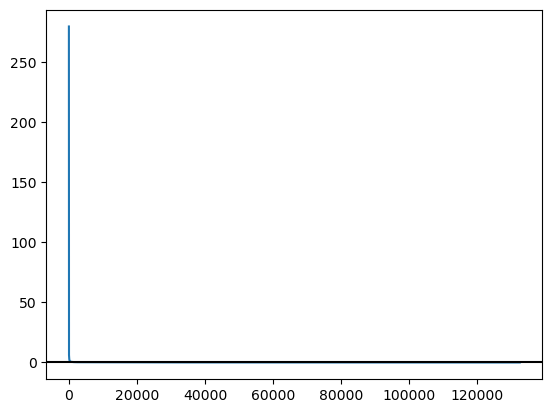

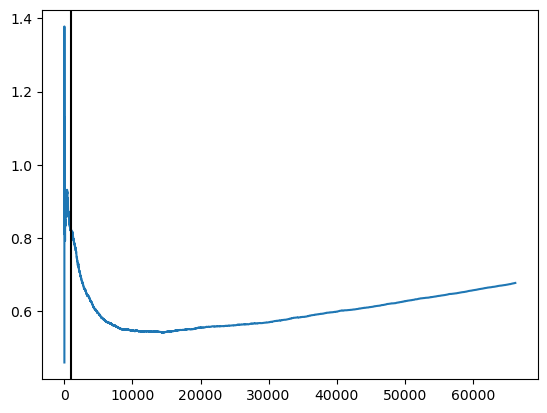

risk:0.007548309178743961
Pump
(110160,)


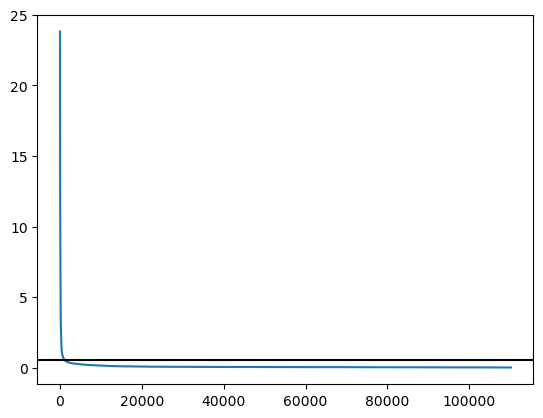

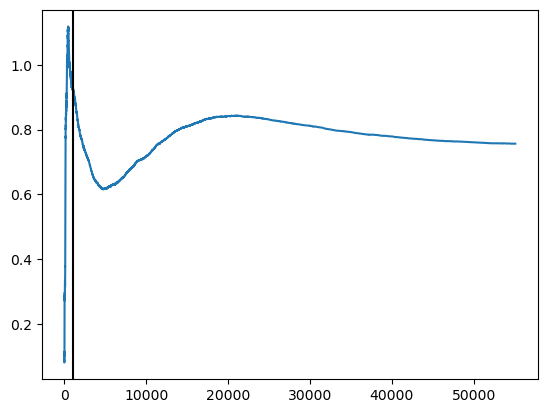

risk:0.00907770515613653
MSL_P-15
(3672,)


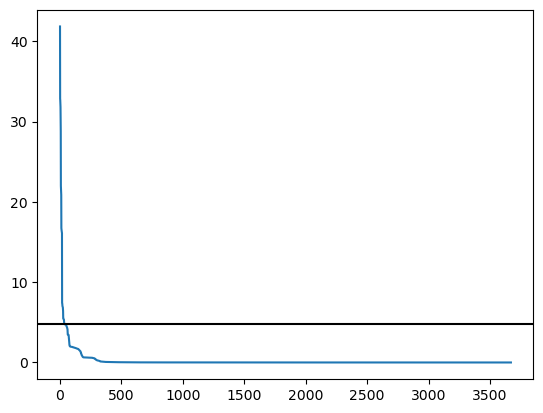

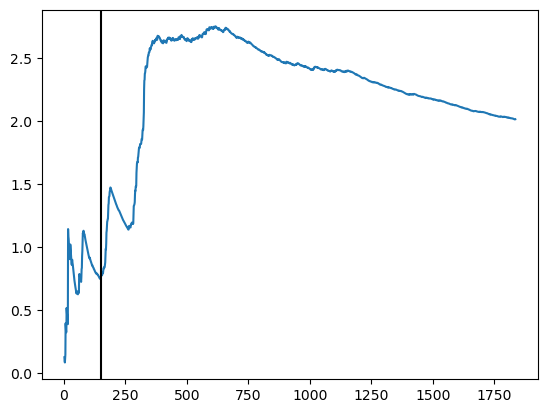

risk:0.04084967320261438
yahoo_20
(396,)


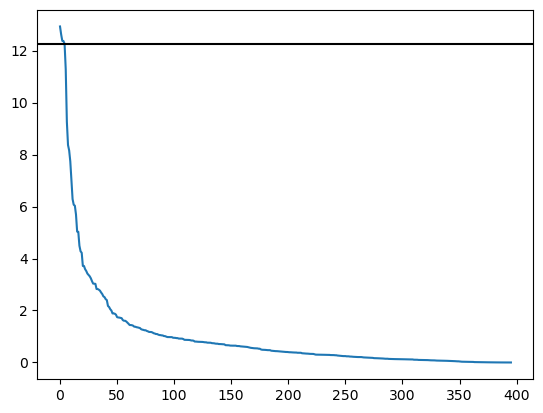

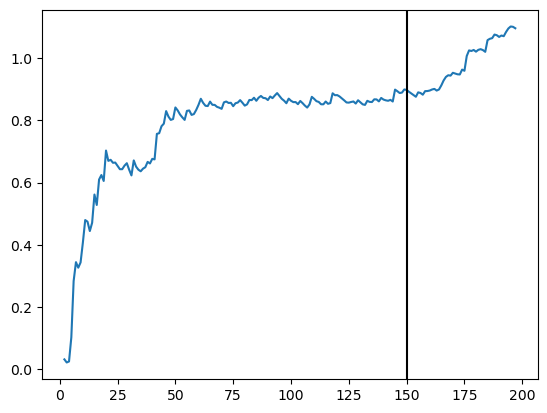

risk:0.3787878787878788


In [40]:
data_list = ["SWaT", "WADI", "PSM", "Pump", "MSL_P-15", "yahoo_20"]
kst = [10000, 3000, 1000, 1000, 150, 30]
for i, data in enumerate(data_list):
    print(data)
    train_error_pt_path = os.path.join("outputs", f"MLP_{data}_normalization_SlowRevIN", "train_errors.pt")
    plot_train_error(train_error_pt_path, kst[i])

MSL_P-15
(3672,)


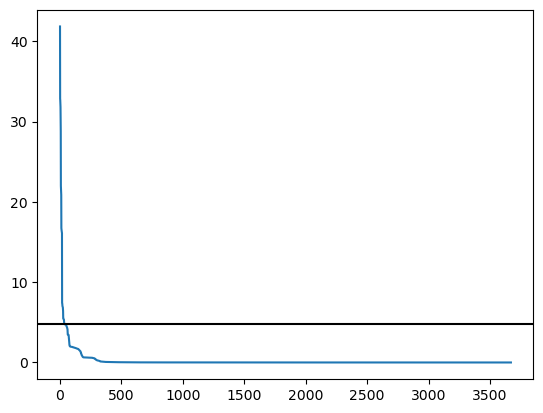

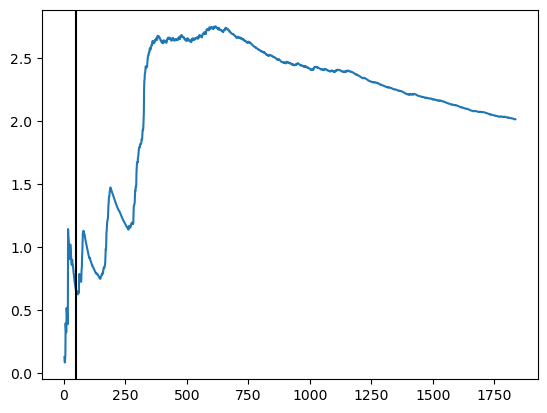

risk:0.013616557734204794


In [45]:
data_list = ["MSL_P-15"]
kst = [50]
for i, data in enumerate(data_list):
    print(data)
    train_error_pt_path = os.path.join("outputs", f"MLP_{data}_normalization_SlowRevIN", "train_errors.pt")
    plot_train_error(train_error_pt_path, kst[i])

yahoo_20
(396,)


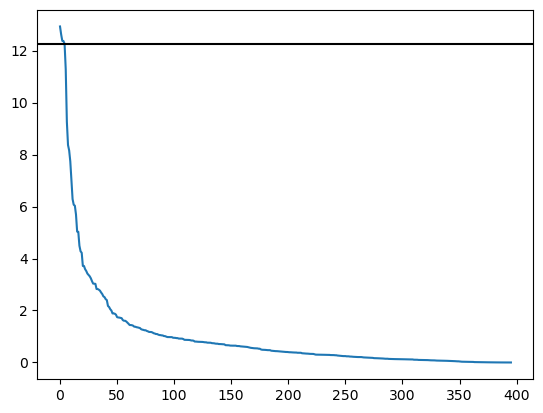

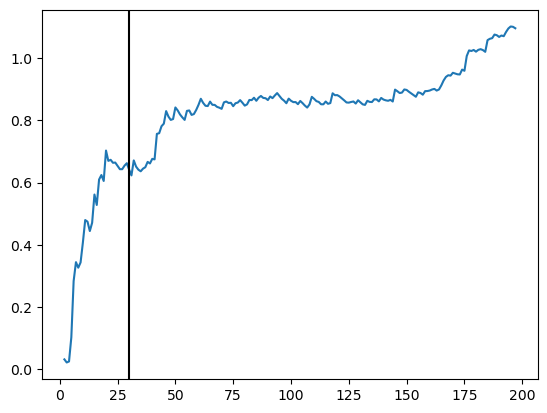

risk:0.07575757575757576


In [41]:
data_list = ["yahoo_20"]
kst = [30]
for i, data in enumerate(data_list):
    print(data)
    train_error_pt_path = os.path.join("outputs", f"MLP_{data}_normalization_SlowRevIN", "train_errors.pt")
    plot_train_error(train_error_pt_path, kst[i])